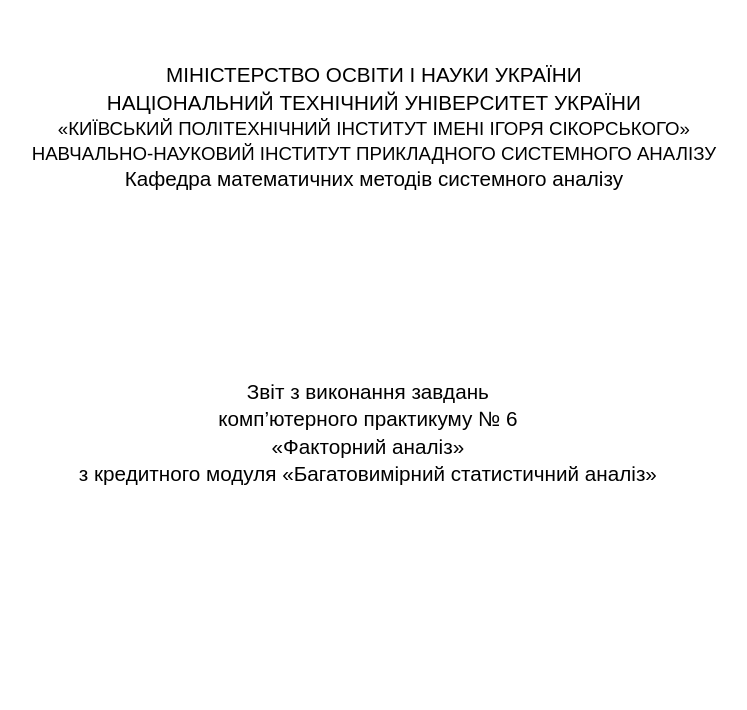

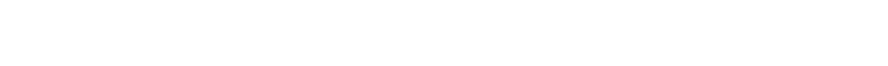

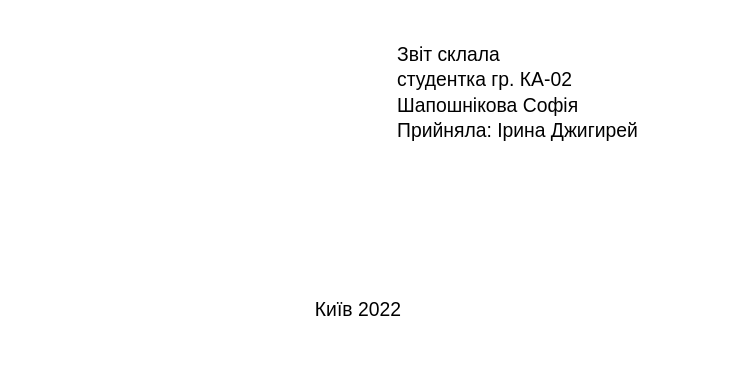

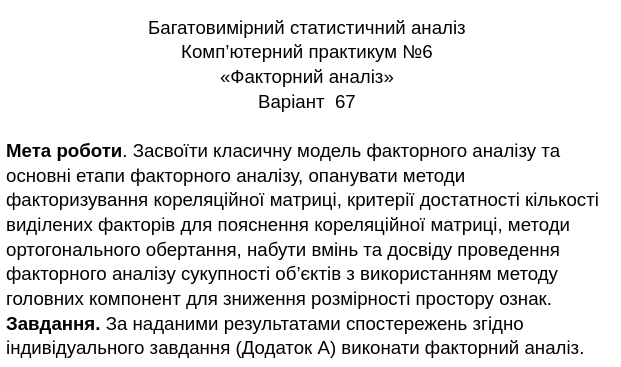

Підключимо небхідні бібліотеки:

In [191]:
# Підключимо бібліотеки для роботи з математичними обчисленнями та масивами даних
import numpy as np
import scipy as sci
# Підключимо бібліотеку для роботи з табличними даними
import pandas as pd
# Підключимо бібліотеки для побудови графіків
import seaborn as sns
import matplotlib.pyplot as plt
# Підключимо функціонал для стандартизації даних з бібліотеки sklearn
from sklearn.preprocessing import StandardScaler
# Підключимо функціонал для обчислення всіх можливих комбінацій масиву
from itertools import combinations
# Підключимо функціонал для факторного аналізу з бібліотеки sklearn
from sklearn import decomposition
# Додатковий функціонал для візуалізації
from matplotlib.pyplot import figure, show
from matplotlib.ticker import MaxNLocator
# Функціонал для факторного аналізу
from factor_analyzer.factor_analyzer import FactorAnalyzer 

In [92]:
data = [[1, -1.0, 2.1, -0.2, 4.8, -0.3, 0.8, 22.3],
[2, -4.3, 2.9, -0.6, 2.9, -1.1, 3.6, 10.9],
[3, -10.7, 8.6, -1.1, 1.7, -1.9, 10.8, 4.6],
[4, -11.3, 3.5, -1.4, 2.4, -2.6, 9.6, 5.7],
[5, -11.4, 3.0, -1.7, 3.1, -3.2, 9.3, 6.4],
[6, -15.4, 3.3, -2.1, 2.8, -4.0, 12.7, 4.8],
[7, -25.3, 4.8, -2.9, 1.8, -5.0, 23.3, 2.8],
[8, -27.1, 4.3, -3.2, 2.0, -5.7, 24.0, 2.7],
[9, -23.0, 3.4, -3.3, 2.9, -6.2, 18.8, 3.5],
[10, -25.2, 3.4, -3.6, 2.9, -6.9, 20.6, 3.3],
[11, -36.8, 4.2, -4.5, 2.1, -8.0, 32.1, 2.1],
[12, -46.8, 5.6, -5.2, 1.7, -9.0, 44.2, 1.6],
[13, -36.2, 3.7, -5.0, 2.6, -9.3, 29.9, 2.3],
[14, -34.4, 3.5, -5.1, 3.0, -9.8, 28.0, 2.5],
[15, -46.3, 4.0, -6.0, 2.4, -10.9, 39.1, 1.8],
[16, -72.2, 29.7, -7.4, 1.3, -12.3, 75.3, 0.9],
[17, -51.8, 4.1, -6.8, 2.4, -12.4, 43.5, 1.6],
[18, -43.3, 3.6, -6.6, 3.1, -12.7, 35.3, 2.0],
[19, -54.5, 4.0, -7.4, 2.6, -13.8, 45.1, 1.6],
[20, -106.3, 0.9, -9.9, 1.0, -15.8, 130.3, 0.6],
[21, -70.7, 4.5, -8.7, 2.1, -15.7, 61.2, 1.2],
[22, -52.5, 3.7, -8.0, 3.2, -15.6, 42.8, 1.7],
[23, -62.0, 3.9, -8.8, 2.8, -16.6, 50.8, 1.4],
[24, -147.2, 2.3, -12.4, 0.7, -19.3, 217.5, 0.3],
[25, -94.1, 5.2, -10.9, 1.8, -19.0, 85.6, 0.9]]

### Завдання 1-4
1) Стандартизувати дані. Факторизування кореляційної матриці провести за допомогою методу головних компонент
2) Максимальну кількість факторів задати рівною кількості ознак
3) Значення критерію Кайзера прийняти рівним одиниці
4) Частина звіту за результатами виконання завдань 1-4 повинна містити:
- кореляційну матрицю змінних
- основні результати аналізу

Стандартизуємо дані з допомогою функціоналу StandardScaler з бібліотеки sklearn

In [93]:
scaler = StandardScaler()

In [94]:
data = scaler.fit_transform(np.array(data)[:,1:])

In [95]:
data = pd.DataFrame(data)

In [96]:
data.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]

Отримали набір даних:

In [97]:
data

,x1,x2,x3,x4,x5,x6,x7
0,1.290940,-0.531710,1.557650,2.906466,1.639526,-0.948737,4.224797
1,1.192763,-0.379139,1.435768,0.601672,1.496710,-0.886913,1.652004
2,1.002359,0.707930,1.283416,-0.853987,1.353894,-0.727936,0.230197
3,0.984509,-0.264711,1.192004,-0.004852,1.228930,-0.754433,0.478449
4,0.981533,-0.360068,1.100593,0.844282,1.121818,-0.761057,0.636428
5,0.862531,-0.302854,0.978711,0.480367,0.979003,-0.685984,0.275334
6,0.567999,-0.016783,0.734947,-0.732682,0.800483,-0.451935,-0.176033
7,0.514448,-0.112140,0.643536,-0.490072,0.675519,-0.436479,-0.198602
8,0.636426,-0.283782,0.613066,0.601672,0.586259,-0.551296,-0.018055
9,0.570974,-0.283782,0.521654,0.601672,0.461295,-0.511552,-0.063191


У даній роботі я вирішила використати два функціонали:
- власна функція для аналізу основних компонент (PCA)
- використанння готового функціоналу з бібліотеки sklearn


In [102]:
def manual_pca(data, n_components):
    # 1: Отримаємо середнє та коваріацію
    mean, cov = np.mean(data, axis=0), np.cov(data.T)

    # 2: Обчислимо власні значення та вектори
    vals, vecs = np.linalg.eig(cov)

    # 3: Знайдемо найбільші N індексів власних векторів
    s = np.argsort(vals)[::-1][:n_components] 
    # Сортуємо від мешого до більшого, перевертаємо список і беремо топ

    # 4: Отримцємо матриці для лінійних перетворень
    eigenvals = vals[s]
    eigenvecs = vecs[:, s]

    # 5: Виконуємо лінійні перетворення
    data_transformed = (data - mean) @ eigenvecs
    return data_transformed

In [105]:
pca_man = manual_pca(data, 7)
pca_man.columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]

In [106]:
pca_man

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,4.891696,1.533554,-2.688335,-0.854237,0.150018,0.016462,-0.000009
1,2.993314,0.053574,-0.197781,-0.840019,0.188595,-0.051163,0.003163
2,1.616894,-1.610607,0.672488,-0.773754,0.176377,-0.088337,0.000052
3,1.991961,-0.375663,0.605096,-0.540947,0.021340,-0.016929,-0.006360
4,2.265638,0.104905,0.158924,-0.117595,-0.272483,0.049276,0.003833
5,1.808935,-0.082118,0.432571,-0.102595,-0.225815,0.037771,-0.009240
6,0.792521,-0.736600,0.909928,-0.507424,0.138892,-0.020353,0.007660
7,0.753171,-0.516063,0.818756,-0.331016,0.065448,-0.000694,-0.004296
8,1.261091,0.082472,0.356752,0.245096,-0.290684,0.048724,0.003988
9,1.106039,0.129029,0.327089,0.309652,-0.273831,0.035380,-0.008456


Візуалізуємо результати:

Діаграми розсіювання до аналізу головних компонент (PCA)

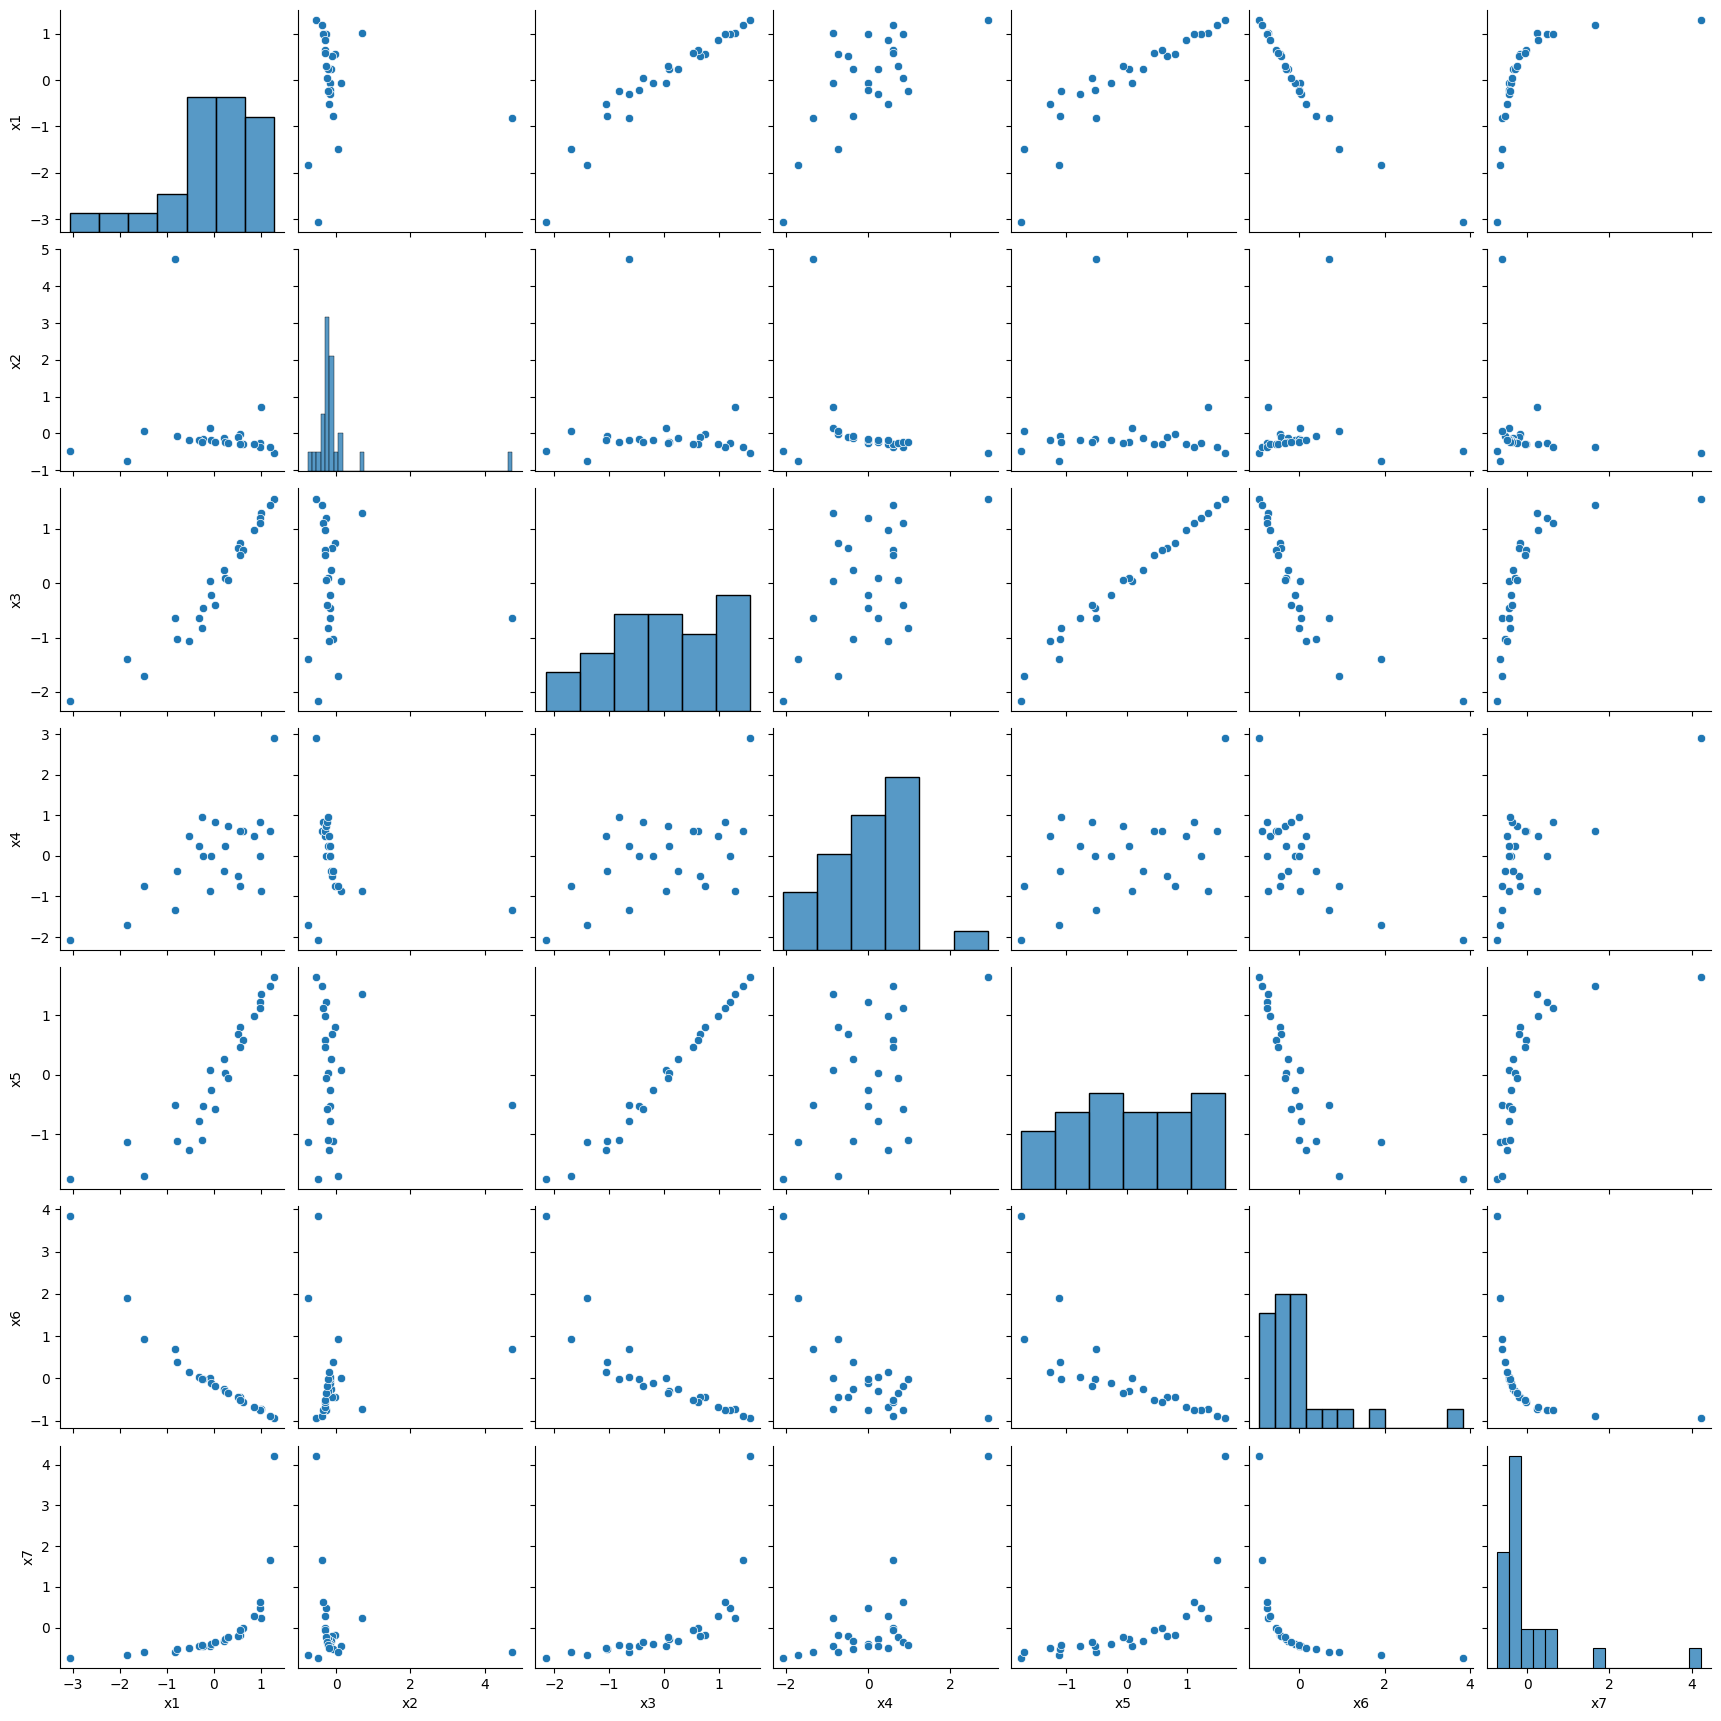

In [120]:
sns.pairplot(data)

Діаграми розсіювання після аналізу головних компонент (PCA)

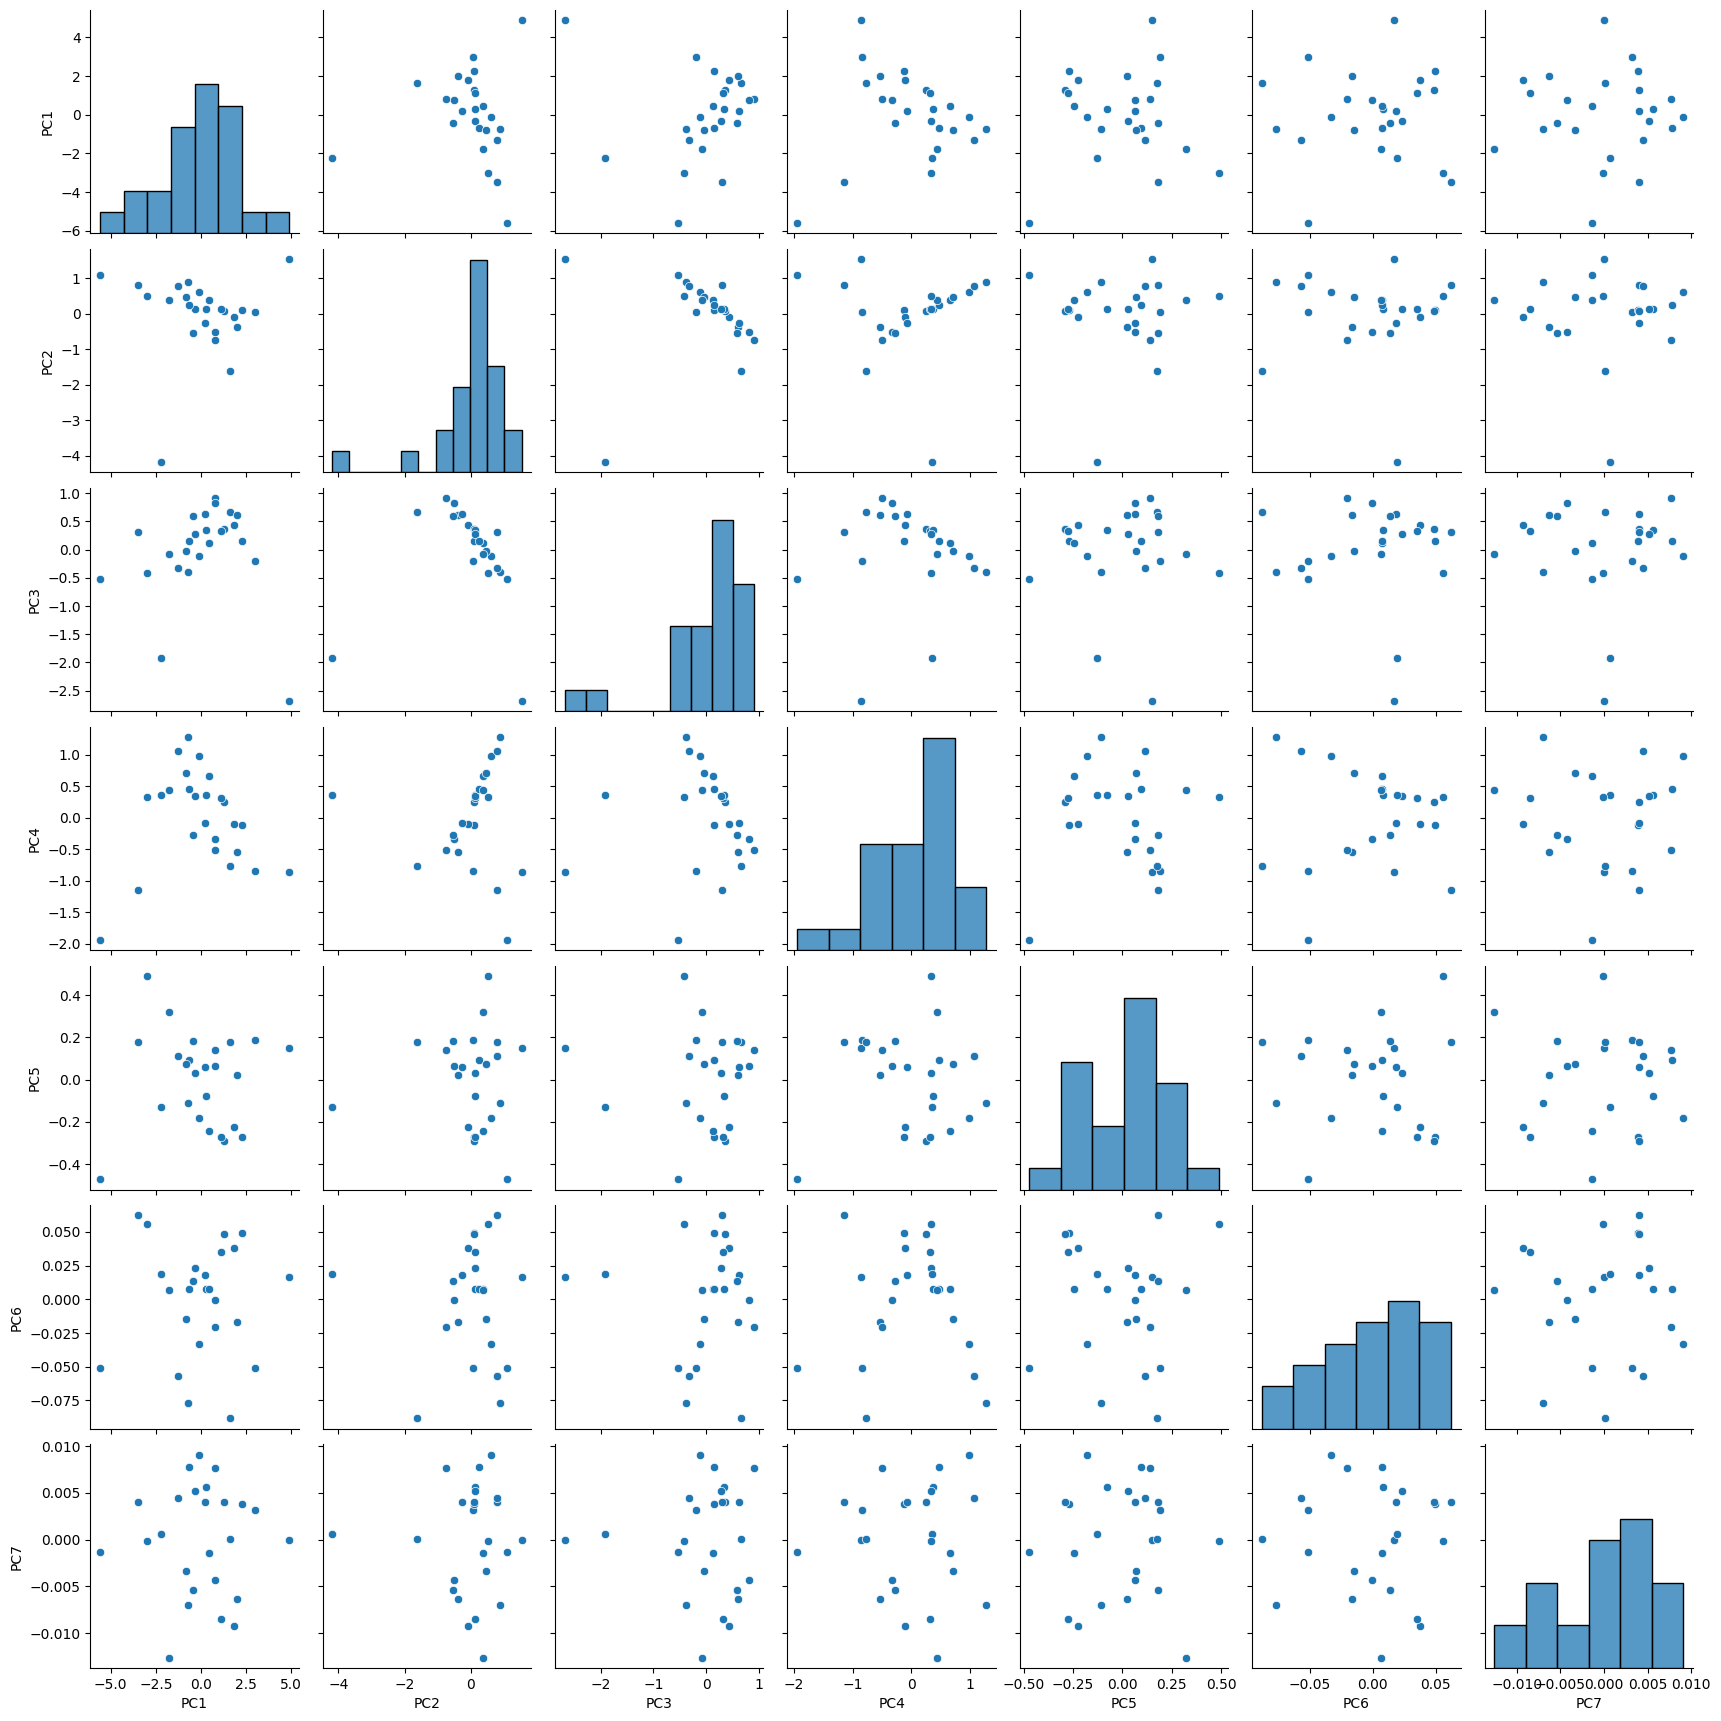

In [121]:
sns.pairplot(pca_man)

Отже, можна помітити, що тепер дані на діаграмі розсіювання є згрупованими. 

Якщо дивитися на гістограми до PCA, можна помітити, що розподіл нагадує експоненцій, рівномірний та інші. 

Після PCA, розподіл нагадує гаусівський на усіх гістограмах.

Тепер використаємо готовий функціонал з бібліотеки sklearn.

In [139]:
pca = decomposition.PCA(n_components=7)

X_pca = pca.fit_transform(data)
print(X_pca.shape)
X_pca = pd.DataFrame(X_pca, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])

(25, 7)


Як бачимо, результати PCA функціоналу з бібліотеки sklearn збігається з результатом PCA, отриманого в результаті використання нашої власної функції

In [140]:
X_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-4.891696,-1.533554,2.688335,0.854237,0.150018,-0.016462,0.000009
1,-2.993314,-0.053574,0.197781,0.840019,0.188595,0.051163,-0.003163
2,-1.616894,1.610607,-0.672488,0.773754,0.176377,0.088337,-0.000052
3,-1.991961,0.375663,-0.605096,0.540947,0.021340,0.016929,0.006360
4,-2.265638,-0.104905,-0.158924,0.117595,-0.272483,-0.049276,-0.003833
5,-1.808935,0.082118,-0.432571,0.102595,-0.225815,-0.037771,0.009240
6,-0.792521,0.736600,-0.909928,0.507424,0.138892,0.020353,-0.007660
7,-0.753171,0.516063,-0.818756,0.331016,0.065448,0.000694,0.004296
8,-1.261091,-0.082472,-0.356752,-0.245096,-0.290684,-0.048724,-0.003988
9,-1.106039,-0.129029,-0.327089,-0.309652,-0.273831,-0.035380,0.008456


**Кореляційна матриця змінних**

<AxesSubplot: >

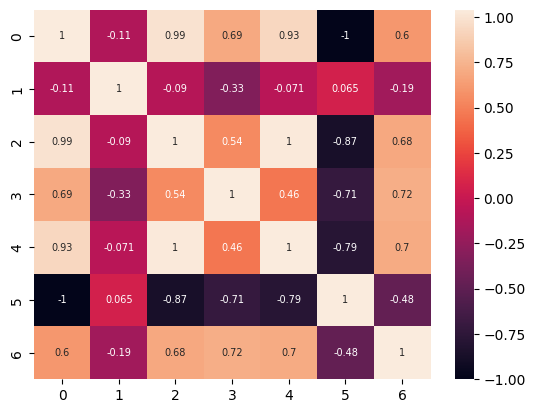

In [135]:
sns.heatmap(np.cov(data.T), annot=True, annot_kws={"size": 7})

**Власні значення та власні вектори**

In [128]:
print('\n Власні значення \n%s' %pd.DataFrame(pca.explained_variance_))
print()
print(' Власні вектори \n%s' %pd.DataFrame(pca.components_))


 Власні значення 
          0
0  4.847097
1  1.178610
2  0.648039
3  0.566738
4  0.049459
5  0.001689
6  0.000034

 Власні вектори 
          0         1         2         3         4         5         6
0 -0.449138  0.086286 -0.441181 -0.346627 -0.423627  0.416671 -0.350664
1  0.126583  0.835429  0.181744 -0.389029  0.205653 -0.131369 -0.205207
2 -0.205921  0.500742 -0.182708  0.421237 -0.163183  0.213331  0.651070
3 -0.171009 -0.188184  0.245997 -0.519534  0.419620  0.482312  0.442952
4  0.000037 -0.091828 -0.259193 -0.511060 -0.301460 -0.606786  0.451815
5  0.748145  0.005031  0.112078 -0.141100 -0.493201  0.392241  0.103360
6 -0.388437 -0.000451  0.773750  0.007620 -0.491337 -0.094609 -0.002452


**Оптимальна к-сть компонент**

Побудуємо графіки каменистого схилу

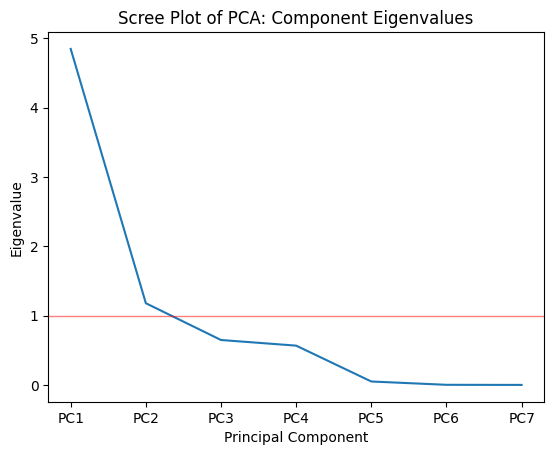

In [182]:
def scree_plot():
    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True)), 
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    ax.set_xticklabels(["PC0", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()
scree_plot()

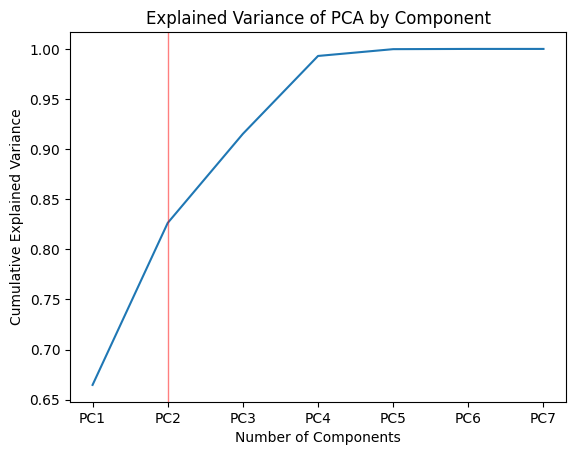

In [183]:
def var_explained():
    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    ax.set_xticklabels(["PC0", "PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
    plt.title('Explained Variance of PCA by Component')
    show()

var_explained()

Можемо зробити висновки, що достатня к-ть компонент - 2

**Дисперсія шуму**

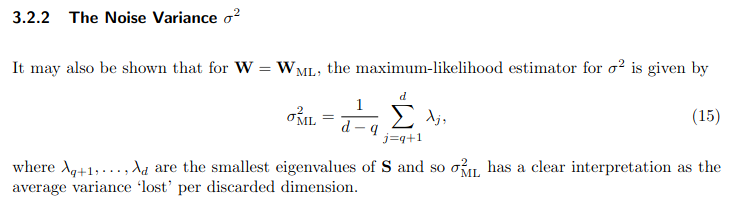

In [137]:
pca.noise_variance_

0.0

**таблиця факторних навантажень**

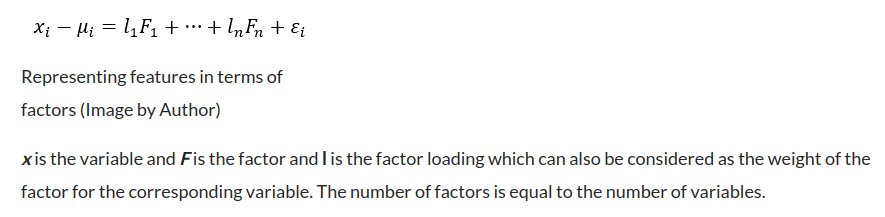

In [225]:
def loadings(loadings):
    results = pd.DataFrame(loadings)
    results.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]
    results.index= ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"]
    print(results)

loadings(pca.components_)

           x1        x2        x3        x4        x5        x6        x7
PC1 -0.449138  0.086286 -0.441181 -0.346627 -0.423627  0.416671 -0.350664
PC2  0.126583  0.835429  0.181744 -0.389029  0.205653 -0.131369 -0.205207
PC3 -0.205921  0.500742 -0.182708  0.421237 -0.163183  0.213331  0.651070
PC4 -0.171009 -0.188184  0.245997 -0.519534  0.419620  0.482312  0.442952
PC5  0.000037 -0.091828 -0.259193 -0.511060 -0.301460 -0.606786  0.451815
PC6  0.748145  0.005031  0.112078 -0.141100 -0.493201  0.392241  0.103360
PC7 -0.388437 -0.000451  0.773750  0.007620 -0.491337 -0.094609 -0.002452


# Завдання 5-6
5) Ортогональне обертання факторів виконати методами варімакс і квартімакс.
6) Визначити достатню кількість виділених факторів. Отримати графік каменистого осипу.

Частина звіту за результатами виконання завдань 5-7 повинна містити:
- графік власних значень
- таблиці факторних навантажень
- таблиці спільностей

Факторний аналіз:
- без обертання
- ортогональне обертання методом **Варімакс** (varimax rotation)
- ортогональне обертання методом **Квартімакс** (quartimax rotation) 

In [233]:
fa = decomposition.FactorAnalysis(n_components = 2)
varimax_fa = decomposition.FactorAnalysis(rotation="varimax",n_components = 2)
quartimax_fa = decomposition.FactorAnalysis(rotation="quartimax",n_components = 2)

In [234]:
col = ["PC1", "PC2"]
fa_var = pd.DataFrame(fa.fit_transform(data), columns = col)
X_fa_var = pd.DataFrame(varimax_fa.fit_transform(data), columns = col)
X_fa_quart = pd.DataFrame(quartimax_fa.fit_transform(data), columns = col)

Порівняємо таблиці, а також візуалізуємо результати:

*ортогональне обертання методом **Варімакс** (varimax rotation)*


Варімакс мінімізує кількість
змінних з високими навантаженнями
на певний фактор, що сприяє
спрощенню описування фактору 
за
рахунок групування навколо нього
тільки тих змінних, які з ним пов’язані
у більшій мірі ніж інші.

In [156]:
X_fa_var

,PC1,PC2
0,-1.664559,-0.126238
1,-1.527496,-0.127995
2,-1.448562,0.064248
3,-1.271660,-0.095326
4,-1.081182,-0.288897
5,-0.969400,-0.235138
6,-0.842880,0.060473
7,-0.710308,-0.001952
8,-0.481436,-0.416902
9,-0.363755,-0.446741


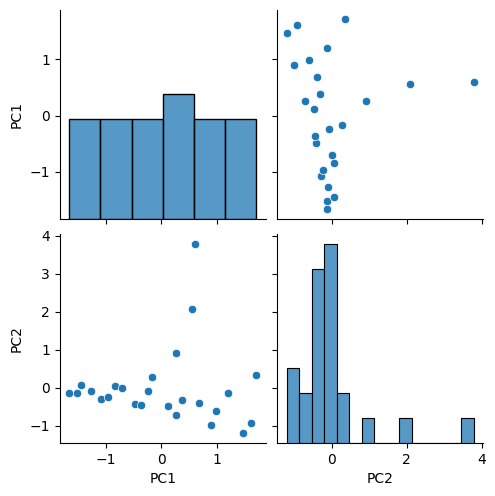

In [157]:
sns.pairplot(X_fa_var)

*ортогональне обертання методом **Квартімакс** (quartimax rotation)*

Квартімакс -
протилежний варімаксу,
оскільки мінімізує кількість
факторів, необхідних для
пояснення певної змінної
(інтепретовність змінних
посилюється)

In [158]:
X_fa_quart

,PC1,PC2
0,-1.443293,0.838808
1,-1.331332,0.759725
2,-1.157391,0.873445
3,-1.101990,0.641736
4,-1.054657,0.374320
5,-0.932085,0.355308
6,-0.660377,0.527262
7,-0.586481,0.400725
8,-0.632901,-0.070880
9,-0.552820,-0.162128


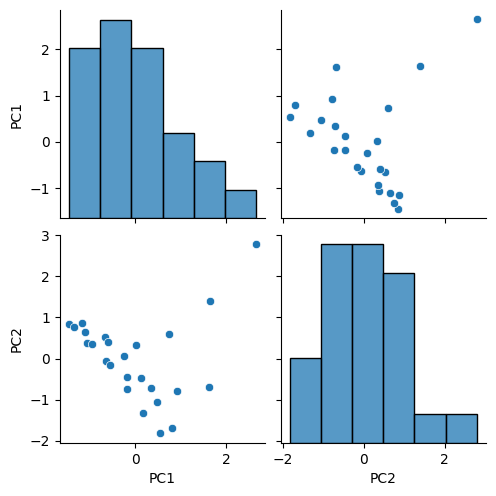

In [159]:
sns.pairplot(X_fa_quart)

Визначимо достатню к-ть факторів

In [237]:
fa_var = FactorAnalyzer(rotation='varimax')
fa_var.fit(data)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [238]:
ev, v = fa_var.get_eigenvalues()
pd.DataFrame(ev)

,0
0,4.653213
1,1.131466
2,0.622118
3,0.544069
4,0.047481
5,0.001621
6,0.000033


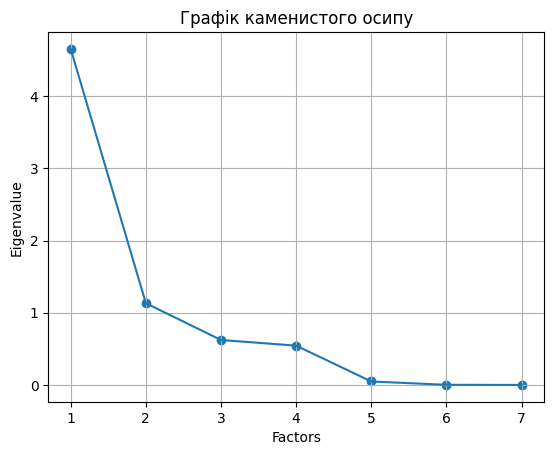

In [210]:
plt.scatter(range(1, data.shape[1]+1), ev)
plt.plot(range(1, data.shape[1]+1), ev)
plt.title('Графік каменистого осипу')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Робимо висновки про достатність 2 факторів за критерієм Кеттеля. Можна також лишити 3ій фактор, оскільки спостерігаємо відносно різкий спад значень власного значення. 
Фактори 4-7 відкидаємо як ті, в яких зміна власного значення не суттєво відрізняється між факторами

 **Таблиця спільностей** для методу *варімакс*

In [240]:
pd.DataFrame(fa_var.get_communalities())

,0
0,0.997361
1,0.109301
2,0.997223
3,1.013651
4,1.002435
5,0.998032
6,0.748502


**Таблиці факторних навантажень**

In [226]:
def loadings(loadings):
    results = pd.DataFrame(loadings)
    results.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7"]
    results.index= ["PC1", "PC2"]
    print(results)

*без обертання*

In [235]:
loadings(fa.components_)

           x1        x2        x3        x4        x5        x6        x7
PC1 -0.979585  0.094964 -0.992882 -0.580268 -0.966908  0.892580 -0.635979
PC2 -0.200912  0.071279  0.118962 -0.469858  0.254254  0.432504  0.219307


*ортогональне обертання методом Варімакс (varimax rotation)*

In [231]:
loadings(varimax_fa.components_)

           x1        x2        x3        x4        x5        x6        x7
PC1 -0.722912  0.042544 -0.904215 -0.241721 -0.954134  0.526108 -0.655258
PC2 -0.690906  0.110855 -0.427039 -0.706433 -0.298638  0.840815 -0.152322


*ортогональне обертання методом Квартімакс (quartimax rotation)*

In [232]:
loadings(quartimax_fa.components_)

           x1        x2        x3        x4        x5        x6        x7
PC1 -0.987107  0.097852 -0.987062 -0.599346 -0.955471  0.909830 -0.626287
PC2 -0.159913  0.067259  0.160237 -0.445266  0.294330  0.394929  0.245622


### Висновки


Під час виконання роботи вдалося попрацювати з методом головних компанент та факторним аналізом.
Було виконане факторизування кореляційної матриці за допомогою методу головних компонентб реалізована функція для аналізу основних компонент, побудовано графіки каменистого схилу, визначено дисперсію шуму, визначено оптимальну к-сть компонент, побудовано таблиці навантажнень. Виконано обертання факторів з допомогою методів квартімакс та варімакс, визначено оптимальну к-сть компонент, побудовано таблиці навантажнень, таблицю спільності для методу варімакс. Проаналізовано результати